## Handling Big Data

In [1]:
# Set working directory
setwd("C:/DataScience")

In [2]:
# Load the ff package
library(ff)

Loading required package: bit
Attaching package bit
package:bit (c) 2008-2012 Jens Oehlschlaegel (GPL-2)
creators: bit bitwhich
coercion: as.logical as.integer as.bit as.bitwhich which
operator: ! & | xor != ==
querying: print length any all min max range sum summary
bit access: length<- [ [<- [[ [[<-
for more help type ?bit

Attaching package: ‘bit’

The following object is masked from ‘package:base’:

    xor

Attaching package ff
- getOption("fftempdir")=="/tmp/Rtmp4K6Oeh"

- getOption("ffextension")=="ff"

- getOption("ffdrop")==TRUE

- getOption("fffinonexit")==TRUE

- getOption("ffpagesize")==65536

- getOption("ffcaching")=="mmnoflush"  -- consider "ffeachflush" if your system stalls on large writes

- getOption("ffbatchbytes")==16777216 -- consider a different value for tuning your system

- getOption("ffmaxbytes")==536870912 -- consider a different value for tuning your system


Attaching package: ‘ff’

The following objects are masked from ‘package:bit’:

    clone, clone.def

In [3]:
# Read a CSV file as ff dataframe
irisff = read.table.ffdf(file="Iris.csv", FUN="read.csv")

In [4]:
# Inspect the class
class(irisff)

[1] "ffdf"

In [5]:
# Inspect the column names
names(irisff)

[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"

In [6]:
# Inspect the first few rows
irisff[1:5,]

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa


In [7]:
# Load the biglm package
# install.packages("biglm") # if biglm library is not installed
library(biglm)

Loading required package: DBI


In [8]:
# Create a linear regression model
model <- biglm(formula = Petal.Width ~ Petal.Length, data = irisff)

In [9]:
# Summarize the model
summary(model)

Large data regression model: biglm(formula = Petal.Width ~ Petal.Length, data = irisff)
Sample size =  150 
                Coef    (95%     CI)     SE p
(Intercept)  -0.3631 -0.4426 -0.2836 0.0398 0
Petal.Length  0.4158  0.3966  0.4349 0.0096 0

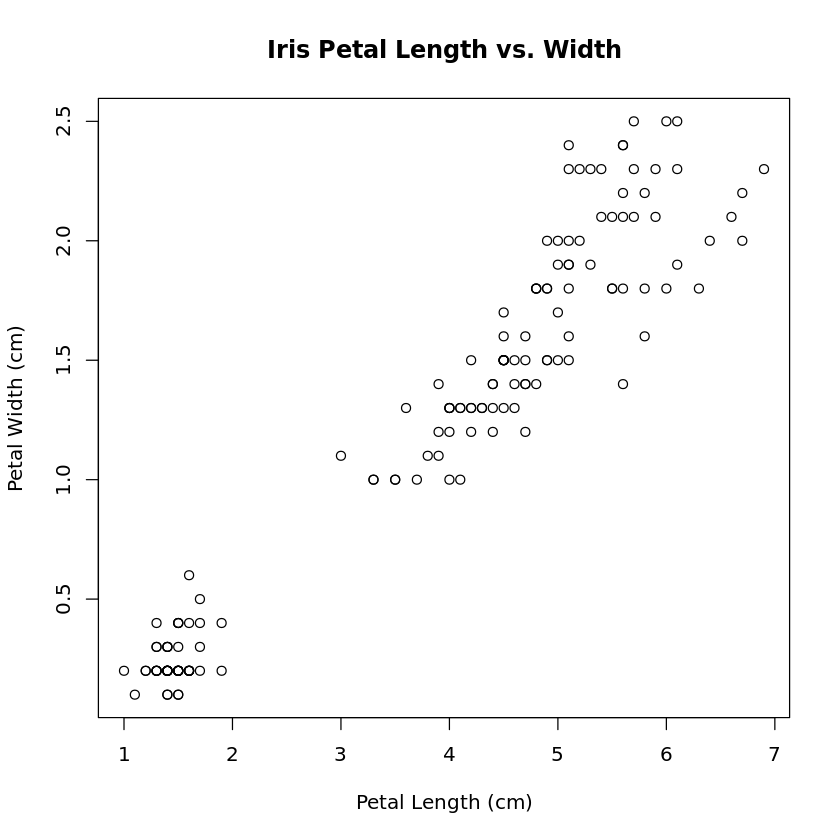

In [10]:
# Create a scatterplot
plot(x = irisff$Petal.Length[], y = irisff$Petal.Width[], main = "Iris Petal Length vs. Width", xlab = "Petal Length (cm)", ylab = "Petal Width (cm)")

In [11]:
# Get y-intercept from model
b <- summary(model)$mat[1,1]

In [12]:
# Get slope from model
m <- summary(model)$mat[2,1]

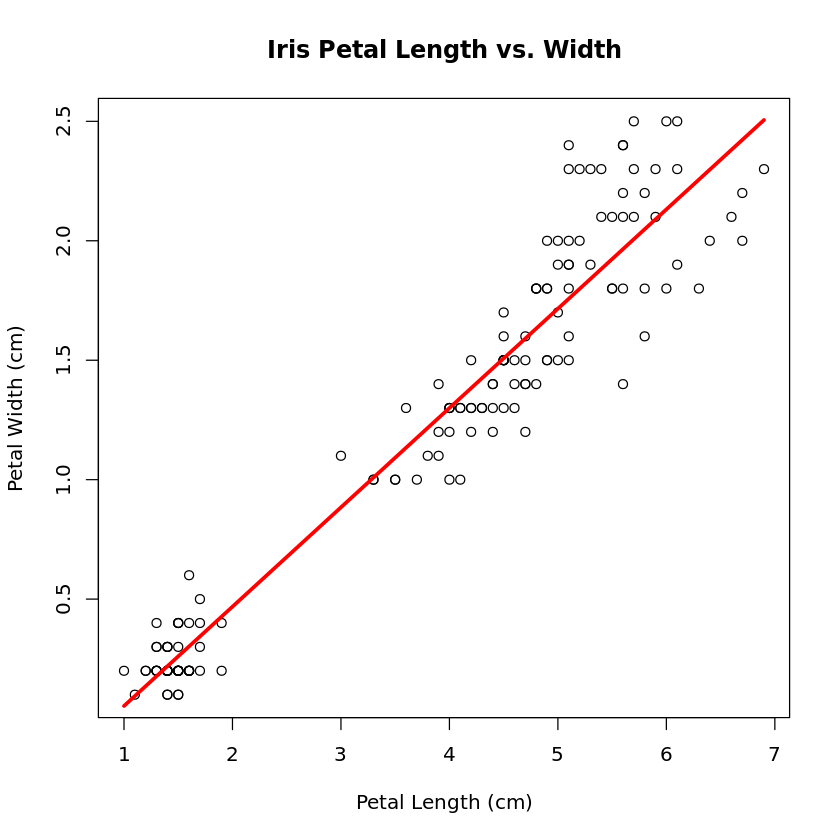

In [13]:
# Draw a regression line on plot
plot(x = irisff$Petal.Length[], y = irisff$Petal.Width[], main = "Iris Petal Length vs. Width", xlab = "Petal Length (cm)", ylab = "Petal Width (cm)")
lines(x = irisff$Petal.Length[], y = m * irisff$Petal.Length[] + b, col = "red", lwd = 3)

In [14]:
# Predict new values with the model
predict(object = model, newdata = data.frame(Petal.Length = c(2, 5, 7), Petal.Width = c(0, 0, 0)))

1,0.4684353
2,1.7157016
3,2.5472124
